# IMPORT

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
# clear_output()


2023-05-31 12:41:37.006781: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 12:41:38.563864: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('GPUs: ', physical_devices)
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

GPUs:  []


2023-05-31 12:42:05.309308: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


# TUTORIAL

In [3]:
x = []
y = []
for i in range(50):
    x.append(np.random.randint(18,65))
    y.append(1)
    x.append(np.random.randint(65,100))
    y.append(0)
for i in range(1000):
    x.append(np.random.randint(18,65))
    y.append(0)
    x.append(np.random.randint(65,100))
    y.append(1)

x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

x = MinMaxScaler((0,1)).fit_transform(x.reshape(-1,1))

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)

# np.random.seed(42)
# np.random.shuffle(xTrain), np.random.shuffle(yTrain)

print(xTrain.shape, yTrain.shape)


(1680, 1) (1680, 1)


In [4]:
model = Sequential(name='sequential_model', layers=[
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')]
)
clear_output()
model.summary()

model.compile( # when compiled the model is ready to fit the data
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    x=xTrain, y=yTrain, validation_split=0.15, batch_size=5, epochs=40, shuffle=True, verbose=2
)


Model: "sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
286/286 - 2s - loss: 0.7028 - accuracy: 0.5161 - val_loss: 0.6811 - val_accuracy: 0.5635 - 2s/epoch - 6ms/step
Epoch 2/40
286/286 - 1s - loss: 0.6637 - accuracy: 0.6478 - val_loss: 0.6465 - val_accuracy: 0.6905 - 574ms/epoch - 2ms/step
Epoch 3/40
286/286 - 1s - loss: 0.6326 - accuracy: 0.6912 - val_loss:

In [5]:
predictions = model.predict(xTest, batch_size=10, verbose=0)
rounded_predictions = np.argmax(predictions, axis=1)

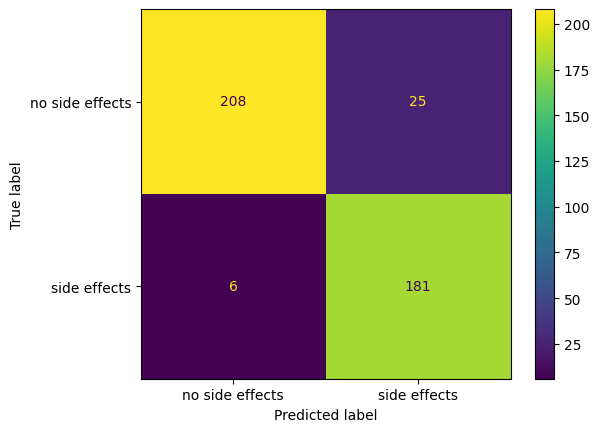

In [6]:
cm =confusion_matrix(y_true=yTest, y_pred=rounded_predictions)
ConfusionMatrixDisplay(cm, display_labels=['no side effects', 'side effects']).plot()
plt.show()

# SAVING MODELS

In [7]:
# saving the model

import os.path
if os.path.isfile('./model_serial.h5') is False:
    model.save('./model_serial.h5')

from keras.models import load_model
imported_model = load_model('./model_serial.h5') 

In [8]:
from datetime import datetime as t

times=[]
for i in range(10,100,10):
    tzero = t.now()
    imported_model.predict(xTest, batch_size=i)
    tfinal = t.now()
    times.append(tfinal-tzero)
clear_output()

for i in times: print(i)




0:00:00.249804
0:00:00.159825
0:00:00.107828
0:00:00.174302
0:00:00.127052
0:00:00.102909
0:00:00.102961
0:00:00.104640
0:00:00.090714


In [9]:
# save just the architecture of the model, not the weights, not the modeling itself
import json

model_architecture = model.to_json()
# print(model_architecture)

with open('./model_architecture.json', 'w') as json_file:
    json_file.write(model_architecture)

with open('./model_architecture.json', 'r') as json_file:
    model_architecture2 = json_file.read()

from keras.models import model_from_json

json_model = model_from_json(model_architecture2)

print(json_model.summary())

Model: "sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
None
